In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np
from astropy.nddata import CCDData
from astropy import units as u
from ccdproc import trim_image, Combiner
from astropy.table import Table

# need to get import to work in notebook w/o global package install
import sys  
sys.path.append('..')
from apextract import extract
from identify import identify, identify_widget

In [2]:
lamp = '../../pydis_example/apo05/05may31.0035r.fits' # HeNeAr lamp

img = CCDData.read(lamp, unit=u.adu)
# put in units of ADU/s
img.data = img.data / (img.header['EXPTIME'])
img.unit = u.adu / u.s

# trim off bias section
img = trim_image(img, fits_section=img.header['DATASEC'])

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [17]:
# this data comes from the APO DIS red channel, which has wavelength axis backwards
# (despite not mentioning in the header)
wapprox = (np.arange(img.shape[1]) - img.shape[1]/2)[::-1] * img.header['DISPDW'] + img.header['DISPWC']
wapprox = wapprox * u.angstrom
# flux = np.nanmean(img[500:525,:], axis=0) - np.nanmedian(img)

In [18]:
fake_trace = np.ones(img.shape[1]) * img.shape[0] / 2
ex_tbl = extract(img, fake_trace, display=False)
flux = ex_tbl['flux']

../apextract.py:287: RuntimeWarning: invalid value encountered in sqrt
  (N_A + N_A**2. / N_B) * (sigB**2.))


In [23]:
# Easiest mode: previously ran identify, saved to output file
ww1 = identify(wapprox.value, flux, identify_mode='file', 
               previous_file='../../pydis_example/05may31.0035r.fits.lines', 
               fit_mode='spline')

# This is a form of "reidentify". 

Mode='file': 38 lines used from ../../pydis_example/05may31.0035r.fits.lines


In [24]:
# plt.plot(ww1, flux)

In [25]:
# a simple table of prominent HeNeAr lines for the instrument in question
apo_henear = Table.read('../../pydis_example/apohenear.dat', 
                        format='ascii', names=('wave',))

In [26]:
ww2 = identify(wapprox.value, flux, identify_mode='nearest', 
               fit_mode='spline', autotol=5, linewave=apo_henear['wave'])

Mode='nearest': 19 lines matched.


In [9]:
# a slight difference in the solution, really impacts near the edges of the data
# plt.plot(ww1, flux)
# plt.plot(ww2, flux)


    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


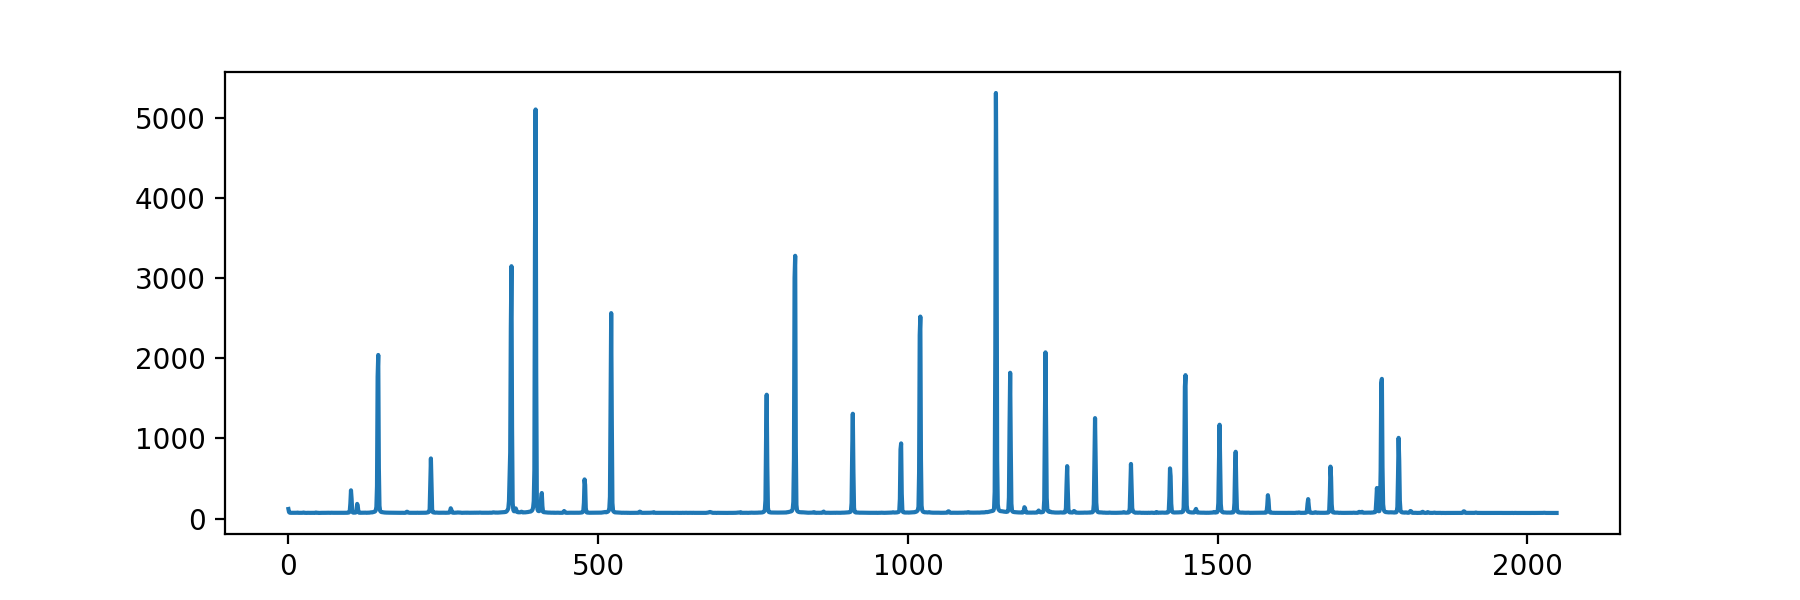

In [11]:
## This makes a nice GUI, but it doesn't return the variables like this... hmm...
xpl, wav = identify_widget(np.arange(len(flux)), flux)

In [ ]:
print(xpl, wav)